In [1]:
import numpy as np
import shap
from xai_visualization.util.load_data import feature_names
from xai_visualization.util.load_data import load_features
from xai_visualization.util.load_data import load_features
import tensorflow as tf
import pickle
import lime
import matplotlib.pyplot as plt

In [2]:
guy_features = load_features("../data/korpus_no_video/001_2016-03-17_Paris", 'novice')
model = tf.keras.models.load_model("../models/test_1.15")
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
def explain(model, samples):
    background_dataset =  guy_features[:1000]
    #explainer = shap.GradientExplainer(model, background_dataset)
    #explainer = shap.KernelExplainer(model, background_dataset) # Also not working
    explainer = shap.DeepExplainer(model, background_dataset) # Currently is not supported in TF2: https://github.com/slundberg/shap/issues/885#issuecomment-564778328
    shap_values = explainer.shap_values(samples)

    return shap_values


In [4]:
print(len(guy_features))

26601


## Experiment with SHAP

In [5]:
data_explain = guy_features[0:30]
shap_values = explain(model, data_explain)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
classes = np.argmax(probability_model.predict(np.array(data_explain)), axis=1)

In [7]:
classes

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
np.array(shap_values).shape

(4, 30, 18)

In [9]:
#np.array(shap_values).transpose(1,0,2)[,:,:].shape

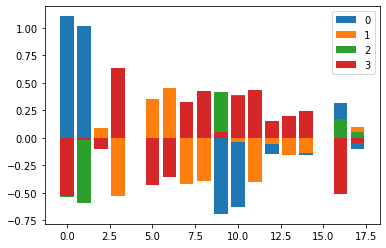

In [10]:
for i in range(4):
    data = np.array(shap_values)[i][29]
    plt.bar(range(18), data)
plt.legend(range(4))

In [11]:
#hap.summary_plot(
#    shap_values, data_explain, 
#    class_names=[str(i) for i in range(18)],
#    feature_names=feature_names
#)

In [12]:
#for samples in np.array_split(guy_features, len(guy_features)/30):
#    print(samples.shape)
#    shap_values = explain(model, np.array(samples))
#    shap.summary_plot(
#        shap_values, samples, 
#        class_names=[str(i) for i in range(18)],
#        feature_names=feature_names
#    )

## Experiment with LIME

In [13]:
explainer = lime.lime_tabular.LimeTabularExplainer(guy_features, feature_names=feature_names, discretize_continuous=False)

In [14]:
#exp = explainer.explain_instance(guy_features[0], probability_model.predict, top_labels=4,num_features=18)
#exp.show_in_notebook(show_table=True, show_all=True)

In [15]:
exp = explainer.explain_instance(guy_features[0], probability_model.predict, top_labels=4, num_features=18)

In [21]:
exp.__dict__

{'random_state': None,
 'mode': 'classification',
 'domain_mapper': <lime.lime_tabular.TableDomainMapper at 0x7f45dc10e850>,
 'local_exp': {0: [(16, -0.2201965960560032),
   (13, -0.037265470973486564),
   (3, 0.03324057094337969),
   (17, 0.023271585779284364),
   (9, 0.017291573697072415),
   (4, 0.015770564817301356),
   (0, -0.01478564099518787),
   (10, 0.013808642604731304),
   (5, -0.012085262108403412),
   (14, -0.011938274269605403),
   (8, -0.010577022351678227),
   (2, 0.01010579830069351),
   (7, 0.010035927538908168),
   (11, 0.00895295639921294),
   (6, -0.007391015361992907),
   (1, 0.0040597620951785575),
   (15, 0.00313864526898505),
   (12, 0.000539515750947748)],
  3: [(16, 0.11940299818328062),
   (13, 0.07899544957887061),
   (3, -0.0586348100632139),
   (2, 0.057035310050090195),
   (14, 0.048228550023805154),
   (6, 0.03706085962716449),
   (7, 0.03410439901910436),
   (11, -0.03005255301983947),
   (5, 0.02806189662974789),
   (17, 0.023380377027499434),
   (8, 

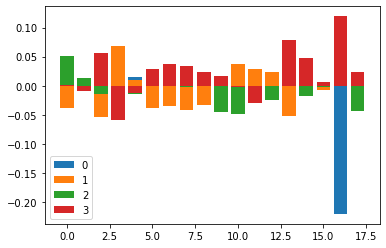

In [17]:
for i in range(4):
    explanations = np.array(exp.local_exp[i])
    indices = explanations[:,0].astype(int)
    explanations = explanations[:,1][np.argsort(indices)]

    plt.bar(range(18), explanations)
plt.legend(range(4))

In [18]:
explanations = np.array(exp.local_exp)
indices = explanations[:,0].astype(int)
explanations[:,1][np.argsort(indices)]

IndexError: too many indices for array

In [ ]:

#explanations[:,:,1][0][indices[0]]

In [ ]:
#for sample in guy_features:
#    print("Predicting")
#    exp= explainer.explain_instance(sample, probability_model.predict, top_labels=4,num_features=18)
#    exp.show_in_notebook(show_table=True, show_all=True)